#Initially, I overviewed all variables that were available and selected a lot of them which were useable. Say, I didn't select occupation because it contained many textual values that were not standardized in fewer categories.

Then, I investigated the variables with respect to WoE, and decided not to use two of them because their categories didn't have different WoE.

Finally, I included all of the remaining variables in the model.

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

In [3]:
loan_data_inputs_train.shape

(373028, 324)

In [4]:
loan_data_targets_train.shape

(373028, 1)

In [5]:
loan_data_inputs_test.shape

(93257, 324)

In [6]:
loan_data_targets_test.shape

(93257, 1)

In [7]:
loan_data_targets_test.head()

,good_bad
362514,1
288564,1
213591,1
263083,1
165001,1


In [8]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [9]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]


1) overviewed all variables that were available and selected a lot of them which were useable. For example, occupation contained many textual values that were not standardized in fewer categories.

2) investigated the variables with respect to WoE, and decided not to use two of them because their categories didn't have different WoE.

3) included all of the remaining variables in the model.

In [10]:
# store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [11]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# drop the variables with variable names in the list with reference categories to avoid collinearity
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [13]:
reg = LogisticRegression()

In [14]:
pd.options.display.max_rows = None

In [15]:
reg.fit(inputs_train,loan_data_targets_train)

/Users/yang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
reg.intercept_

array([-1.30144697])

In [17]:
reg.coef_

array([[ 1.15874129,  0.90981804,  0.71204023,  0.51793095,  0.33734059,
         0.1491889 ,  0.09217599,  0.10670661,  0.03211642,  0.05423936,
         0.05517666,  0.0579561 ,  0.07330303,  0.13187863,  0.09590263,
         0.1803758 ,  0.22215668,  0.22088528,  0.2583667 ,  0.31648515,
         0.51924089,  0.08695389, -0.00886079,  0.3047552 ,  0.20079276,
         0.21297832,  0.26637294,  0.05455155,  0.07955791,  0.09979714,
         0.12398788,  0.08914828,  0.05864373,  0.12226111,  0.9750766 ,
         0.7969501 ,  0.71675391,  0.53068931,  0.37491548,  0.13064561,
        -0.07043617,  0.85369772,  0.53545432,  0.28972915,  0.10309056,
         0.03321862,  0.03341243,  0.08177537,  0.11257996,  0.11194358,
         0.05924795,  0.01796817,  0.62189991,  0.47802703,  0.26962838,
        -0.00583416, -0.10544378, -0.13189587, -0.1472884 , -0.15601314,
        -0.1234953 , -0.20634488,  0.12610987,  0.17588807, -0.02172507,
         0.02058746,  0.21926543,  0.03822513,  0.0

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.301447
1,grade:A,1.158741
2,grade:B,0.909818
3,grade:C,0.712040
4,grade:D,0.517931
5,grade:E,0.337341
6,grade:F,0.149189
7,home_ownership:OWN,0.092176
8,home_ownership:MORTGAGE,0.106707
9,addr_state:NM_VA,0.032116


In [20]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        F_ij = F_ij.astype(float)
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [21]:
reg = LogisticRegression_with_p_values()

In [22]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/yang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.301447
1,grade:A,1.158741
2,grade:B,0.909818
3,grade:C,0.712040
4,grade:D,0.517931
5,grade:E,0.337341
6,grade:F,0.149189
7,home_ownership:OWN,0.092176
8,home_ownership:MORTGAGE,0.106707
9,addr_state:NM_VA,0.032116


In [24]:
p_values = reg.p_values

In [25]:
p_values = np.append(np.nan, np.array(p_values))

In [26]:
summary_table['p_values'] = p_values

In [27]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.301447,NaN
1,grade:A,1.158741,2.069020e-37
2,grade:B,0.909818,6.014126e-50
3,grade:C,0.712040,3.883575e-36
4,grade:D,0.517931,6.754791e-22
5,grade:E,0.337341,2.294274e-12
6,grade:F,0.149189,2.918287e-03
7,home_ownership:OWN,0.092176,4.955234e-06
8,home_ownership:MORTGAGE,0.106707,4.503492e-17
9,addr_state:NM_VA,0.032116,3.168464e-01


In [28]:
# remove some features whose coefficients for all or almost all of the dummy variables are not tatistically significant.

# Variables
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [29]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [30]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,True,False,False,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
206088,False,False,True,False,False,False,False,True,0,False,...,0,1,0,0,1,0,0,0,0,0
136020,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
412305,False,False,False,True,False,False,False,False,0,False,...,0,1,0,0,1,0,0,0,0,0
36159,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0


In [31]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

/Users/yang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/yang/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
feature_name = inputs_train.columns.values

In [33]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-1.367129
1,grade:A,1.138835
2,grade:B,0.889251
3,grade:C,0.691568
4,grade:D,0.500232
5,grade:E,0.322848
6,grade:F,0.134419
7,home_ownership:OWN,0.093977
8,home_ownership:MORTGAGE,0.105745
9,addr_state:NM_VA,0.032606


In [34]:
p_values = reg2.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.367129,NaN
1,grade:A,1.138835,2.769608e-36
2,grade:B,0.889251,5.457938e-48
3,grade:C,0.691568,1.925238e-34
4,grade:D,0.500232,8.490834e-21
5,grade:E,0.322848,8.446257e-12
6,grade:F,0.134419,6.178434e-03
7,home_ownership:OWN,0.093977,3.071834e-06
8,home_ownership:MORTGAGE,0.105745,6.149455e-17
9,addr_state:NM_VA,0.032606,3.086860e-01


In [35]:
import pickle

In [36]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

In [37]:
import statsmodels.api as sm


In [38]:
inputs_train.dtypes

grade:A                                 bool
grade:B                                 bool
grade:C                                 bool
grade:D                                 bool
grade:E                                 bool
grade:F                                 bool
home_ownership:OWN                      bool
home_ownership:MORTGAGE                 bool
addr_state:NM_VA                       int64
addr_state:NY                           bool
addr_state:OK_TN_MO_LA_MD_NC           int64
addr_state:CA                           bool
addr_state:UT_KY_AZ_NJ                 int64
addr_state:AR_MI_PA_OH_MN              int64
addr_state:RI_MA_DE_SD_IN              int64
addr_state:GA_WA_OR                    int64
addr_state:WI_MT                       int64
addr_state:TX                           bool
addr_state:IL_CT                       int64
addr_state:KS_SC_CO_VT_AK_MS           int64
addr_state:WV_NH_WY_DC_ME_ID           int64
verification_status:Not Verified        bool
verificati

In [39]:
inputs_train.isna().sum()

grade:A                                0
grade:B                                0
grade:C                                0
grade:D                                0
grade:E                                0
grade:F                                0
home_ownership:OWN                     0
home_ownership:MORTGAGE                0
addr_state:NM_VA                       0
addr_state:NY                          0
addr_state:OK_TN_MO_LA_MD_NC           0
addr_state:CA                          0
addr_state:UT_KY_AZ_NJ                 0
addr_state:AR_MI_PA_OH_MN              0
addr_state:RI_MA_DE_SD_IN              0
addr_state:GA_WA_OR                    0
addr_state:WI_MT                       0
addr_state:TX                          0
addr_state:IL_CT                       0
addr_state:KS_SC_CO_VT_AK_MS           0
addr_state:WV_NH_WY_DC_ME_ID           0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:credit_card                    0
purpose:debt_con

In [40]:
inputs_train_np = inputs_train.astype(int)

In [42]:
model = sm.Logit(loan_data_targets_train, sm.add_constant(inputs_train_np))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.320670
         Iterations 7


In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               good_bad   No. Observations:               373028
Model:                          Logit   Df Residuals:                   372943
Method:                           MLE   Df Model:                           84
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                 0.07075
Time:                        22:05:18   Log-Likelihood:            -1.1962e+05
converged:                       True   LL-Null:                   -1.2873e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -1.4699      0.157     -9.352      0.000      -1.778      -1.162
grade:A                                 1.1210      0.091     12.338      0.000       0.943       1.299
grade:B                                 0.8907      0.061     14.560      0.000       0.771       1.011
grade:C                                 0.6956      0.057     12.267      0.000       0.584       0.807
grade:D                                 0.5057      0.054      9.391      0.000       0.400       0.611
grade:E                                 0.3314      0.048      6.885      0.000       0.237       0.426
grade:F                                 0.1445      0.050      2.879      0.004       0.046       0.243
home_ownership:OWN                      0.0946      0.020      4.692      0.000       0.055       0.134
home_ownership:MORTGAGE                 0.1058      0.013      8.363      0.000       0.081       0.131
addr_state:NM_VA                        0.0375      0.032      1.169      0.242      -0.025       0.100
addr_state:NY                           0.0575      0.024      2.371      0.018       0.010       0.105
addr_state:OK_TN_MO_LA_MD_NC            0.0607      0.023      2.615      0.009       0.015       0.106
addr_state:CA                           0.0643      0.021      3.026      0.002       0.023       0.106
addr_state:UT_KY_AZ_NJ                  0.0786      0.025      3.150      0.002       0.030       0.128
addr_state:AR_MI_PA_OH_MN               0.1365      0.023      6.044      0.000       0.092       0.181
addr_state:RI_MA_DE_SD_IN               0.1015      0.030      3.396      0.001       0.043       0.160
addr_state:GA_WA_OR                     0.1865      0.027      6.982      0.000       0.134       0.239
addr_state:WI_MT                        0.2413      0.048      5.070      0.000       0.148       0.335
addr_state:TX                           0.2239      0.026      8.605      0.000       0.173       0.275
addr_state:IL_CT                        0.2636      0.029      9.010      0.000       0.206       0.321
addr_state:KS_SC_CO_VT_AK_MS            0.3221      0.031     10.432      0.000       0.262       0.383
addr_state:WV_NH_WY_DC_ME_ID            0.5264      0.053      9.880      0.000       0.422       0.631
verification_status:Not Verified        0.0850      0.015      5.810      0.000       0.056       0.114
verification_status:Source Verified    -0.0092      0.013     -0.685      0.493      -0.036       0.017
purpose:credit_card                     0.3045      0.028     10.718      0.000       0.249       0.360
purpose:debt_consolidation              0.2001      0.026      7.651      0.000       0.149       0.251
purpose:oth__med__vacation              0.2158      0.031      6.909      0.000       0.155       0.277
purpose:major_purch__car__home_impr     0.2680      0.031      8.547      0.000       0.207       0.330
initial_list_stat

# PD Model Validation

In [44]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_issue_d:<38',
'mths_since_issue_d:38-39',
'mths_since_issue_d:40-41',
'mths_since_issue_d:42-48',
'mths_since_issue_d:49-52',
'mths_since_issue_d:53-64',
'mths_since_issue_d:65-84',
'mths_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86',
]]

In [45]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'inq_last_6mths:>6',
'acc_now_delinq:0',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [46]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
288564,False,False,False,False,True,False,False,True,0,False,...,0,0,0,0,1,0,0,0,0,0
213591,False,False,True,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0
263083,False,False,True,False,False,False,False,True,0,False,...,1,0,0,0,1,0,0,0,0,0
165001,True,False,False,False,False,False,False,True,0,False,...,0,0,1,0,1,0,0,0,0,0


In [47]:
y_hat_test = reg2.model.predict(inputs_test)
#calculate odds and apply default cutoff = 0.5

In [48]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test) #get raw probability

In [50]:
y_hat_test_proba #probability of default and not default(1-default)

array([[0.07965185, 0.92034815],
       [0.13714058, 0.86285942],
       [0.11383159, 0.88616841],
       ...,
       [0.02344294, 0.97655706],
       [0.0415098 , 0.9584902 ],
       [0.0489306 , 0.9510694 ]])

In [51]:
y_hat_test_proba = y_hat_test_proba[:][:,1]
y_hat_test_proba

array([0.92034815, 0.86285942, 0.88616841, ..., 0.97655706, 0.9584902 ,
       0.9510694 ])

In [52]:
loan_data_targets_test_temp = loan_data_targets_test

In [53]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [54]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.head()

,good_bad,0
0,1,0.920348
1,1,0.862859
2,1,0.886168
3,1,0.935329
4,1,0.967727


In [55]:
df_actual_predicted_probs.shape

(93257, 2)

In [56]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [57]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [58]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
362514,1,0.920348
288564,1,0.862859
213591,1,0.886168
263083,1,0.935329
165001,1,0.967727


# Accuracy and AUC

In [59]:
tr = 0.5#cutoff
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Confusion Matrix

Predicted,0,1
Actual,,
0,6,10184
1,4,83063


In [60]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]


Predicted,0,1
Actual,,
0,0.000064,0.109204
1,0.000043,0.890689


In [61]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0,0]+(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
             rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1,1]
# false positive are more important

0.8907535091199589

In [62]:
accuracy_list=[]

for i in np.arange(0, 1, 0.05):
    df = []
    df = pd.DataFrame(df)
    df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > i, 1, 0)
    ct = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], 
                     df_actual_predicted_probs['y_hat_test'], 
                     rownames=['Actual'], 
                     colnames=['Predicted'])
    
    ct = ct.reindex(index=[0, 1], columns=[0, 1], fill_value=0)
    
    acc = (ct.iloc[0, 0] + ct.iloc[1, 1]) / df_actual_predicted_probs.shape[0]
    accuracy_list.append((i,acc))

accuracy_df = pd.DataFrame(accuracy_list, columns = ['cutoff','accuracy'])               
max_prob_row = accuracy_df.loc[accuracy_df['accuracy'].idxmax()]

max_prob_row 
                         

cutoff      0.500000
accuracy    0.890754
Name: 10, dtype: float64

In [63]:
accuracy_df

,cutoff,accuracy
0,0.00,0.890732
1,0.05,0.890732
2,0.10,0.890732
3,0.15,0.890732
4,0.20,0.890732
5,0.25,0.890732
6,0.30,0.890732
7,0.35,0.890732
8,0.40,0.890721
9,0.45,0.890721


In [64]:
import matplotlib.pyplot as plt

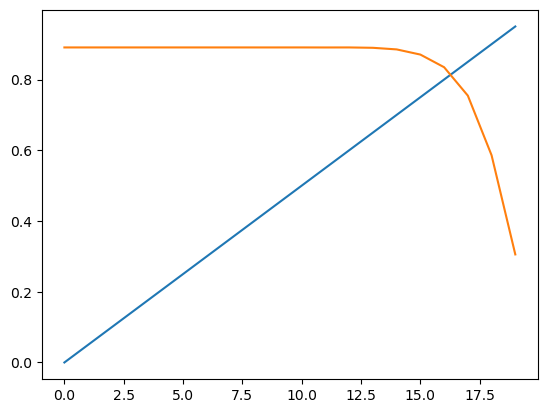

In [65]:
plt.plot(accuracy_df)

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

In [67]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# false positive rate
# true positive rate
# threshold

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([       inf, 0.99194446, 0.9902417 , ..., 0.49039009, 0.39663846,
        0.37824114]))

In [68]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

Text(0.5, 1.0, 'ROC curve')

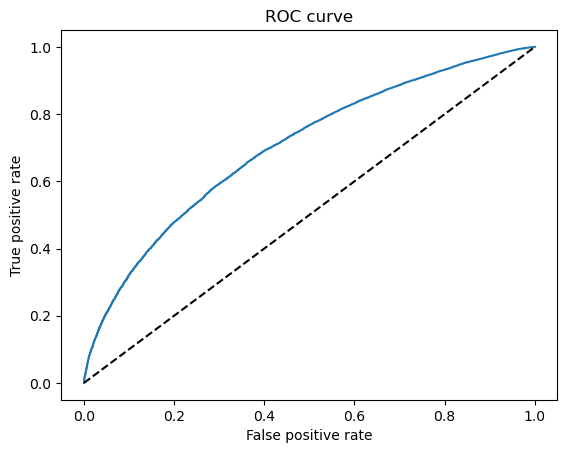

In [69]:
plt.plot(fpr, tpr)
#plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [70]:
AUC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

AUC

0.7018039217618213

# Gini and Kolmogorov-Smirnov

The Gini coefficient is a statistical measure of inequality between two classes, in our case, the good borrowers and bad borrowers. The Gini coefficient is often used to evaluate a binary classification model’s performance. It ranges between 0 and 1, with 1 representing perfect separation between classes and 0.5 indicating that the model is no better than random guessing.

gini = (2 * auc_score) — 1

The Kolmogorov-Smirnov test is a statistical test that compares the cumulative distribution function (CDF) of two samples. A higher value indicates that the model is better at separating the two classes. The Kolmogorov-Smirnov statistic can be used to determine the optimal classification threshold for a model by finding the point on the ROC curve with the maximum distance between the true positive rate and the false positive rate.

positive_values = y_prob[y_true == 0]

negative_values = y_prob[y_true == 1]

ks = max([abs(np.mean(positive_values <= threshold) — np.mean(negative_values <= threshold)) for threshold in y_prob])

In [71]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [72]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index() #with original index as the first column

In [73]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.378241,0
1,42344,1,0.394498,0
2,39810,0,0.396638,0
3,40518,0,0.453803,0
4,42396,0,0.454937,0


In [74]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
93252,239228,1,0.990949,1
93253,266566,1,0.991232,1
93254,302494,1,0.991264,1
93255,261086,1,0.991265,1
93256,242624,1,0.991944,1


In [75]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# the cumulative number of all observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# cumulative number of 'bad'

In [76]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.378241,0,1,1,0
1,42344,1,0.394498,0,2,2,0
2,39810,0,0.396638,0,3,2,1
3,40518,0,0.453803,0,4,2,2
4,42396,0,0.454937,0,5,2,3


In [77]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
#  cumulative percentage of test 'good' in total actual good
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
#  the cumulative percentage of test 'bad' in total actual bad

df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.378241,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.394498,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.396638,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.453803,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.454937,0,5,2,3,0.000054,0.000024,0.000294


In [78]:
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'Gini')

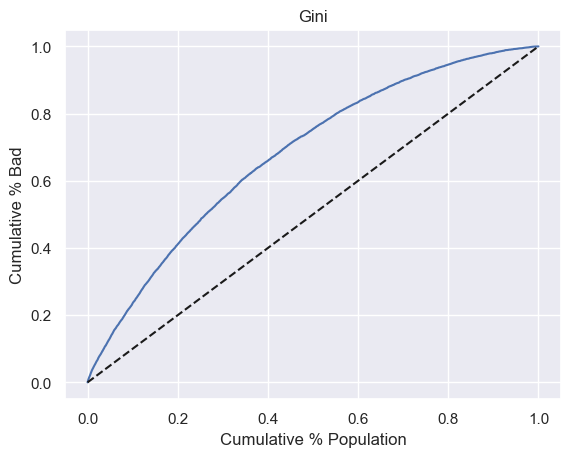

In [79]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# 0.5 for reference
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [80]:
Gini = AUC * 2 - 1

Gini

0.40360784352364254

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

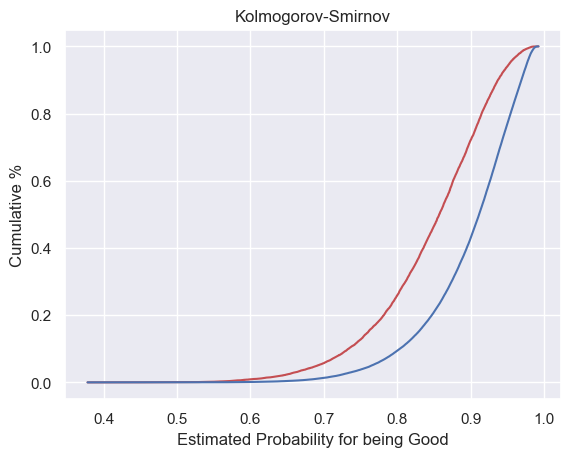

In [81]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

# for a certain predicted probability, what are the probabilities of being actual good or bad?

In [82]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.2945987509544686

In [83]:
df_actual_predicted_probs['difference'] = df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good']

df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad,difference
0,42341,1,0.378241,0,1,1,0,0.000011,0.000012,0.000000,-0.000012
1,42344,1,0.394498,0,2,2,0,0.000021,0.000024,0.000000,-0.000024
2,39810,0,0.396638,0,3,2,1,0.000032,0.000024,0.000098,0.000074
3,40518,0,0.453803,0,4,2,2,0.000043,0.000024,0.000196,0.000172
4,42396,0,0.454937,0,5,2,3,0.000054,0.000024,0.000294,0.000270


In [84]:
df_actual_predicted_probs.loc[df_actual_predicted_probs['difference'].idxmax()]
#using 0.88 as the cutoff probability could achieve the best separation between the true positive rate and the false positive rate

index                         111051.000000
loan_data_targets_test             0.000000
y_hat_test_proba                   0.882992
y_hat_test                         0.000000
Cumulative N Population        34933.000000
Cumulative N Good              28442.000000
Cumulative N Bad                6491.000000
Cumulative Perc Population         0.374589
Cumulative Perc Good               0.342398
Cumulative Perc Bad                0.636997
difference                         0.294599
Name: 34932, dtype: float64

### Creating a Scorecard

In [85]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.367129,NaN
1,grade:A,1.138835,2.769608e-36
2,grade:B,0.889251,5.457938e-48
3,grade:C,0.691568,1.925238e-34
4,grade:D,0.500232,8.490834e-21
5,grade:E,0.322848,8.446257e-12
6,grade:F,0.134419,6.178434e-03
7,home_ownership:OWN,0.093977,3.071834e-06
8,home_ownership:MORTGAGE,0.105745,6.149455e-17
9,addr_state:NM_VA,0.032606,3.086860e-01


In [86]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [87]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [88]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-1.367129,NaN
1,1,grade:A,1.138835,2.769608e-36
2,2,grade:B,0.889251,5.457938e-48
3,3,grade:C,0.691568,1.925238e-34
4,4,grade:D,0.500232,8.490834e-21
5,5,grade:E,0.322848,8.446257e-12
6,6,grade:F,0.134419,6.178434e-03
7,7,home_ownership:OWN,0.093977,3.071834e-06
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17
9,9,addr_state:NM_VA,0.032606,3.086860e-01


In [89]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-1.367129,NaN,Intercept
1,1,grade:A,1.138835,2.769608e-36,grade
2,2,grade:B,0.889251,5.457938e-48,grade
3,3,grade:C,0.691568,1.925238e-34,grade
4,4,grade:D,0.500232,8.490834e-21,grade
5,5,grade:E,0.322848,8.446257e-12,grade
6,6,grade:F,0.134419,6.178434e-03,grade
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state


In [90]:
min_score = 300
max_score = 850

In [91]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
Intercept                     -1.367129
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.077270
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.078105
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.008869
Name: Coefficients, dtype: float64

In [92]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-1.5313730347705645

In [93]:

df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
Intercept                     -1.367129
acc_now_delinq                 0.191394
addr_state                     0.515521
annual_inc                     0.559463
dti                            0.393405
emp_length                     0.125088
grade                          1.138835
home_ownership                 0.105745
initial_list_status            0.055705
inq_last_6mths                 0.657848
int_rate                       0.868607
mths_since_earliest_cr_line    0.119135
mths_since_issue_d             0.973668
mths_since_last_delinq         0.185568
mths_since_last_record         0.508990
purpose                        0.304254
term                           0.078659
verification_status            0.084624
Name: Coefficients, dtype: float64

In [94]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

5.499378860910203

In [95]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.367129,NaN,Intercept,-106.947435
1,1,grade:A,1.138835,2.769608e-36,grade,89.088502
2,2,grade:B,0.889251,5.457938e-48,grade,69.564130
3,3,grade:C,0.691568,1.925238e-34,grade,54.099791
4,4,grade:D,0.500232,8.490834e-21,grade,39.132031
5,5,grade:E,0.322848,8.446257e-12,grade,25.255652
6,6,grade:F,0.134419,6.178434e-03,grade,10.515334
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership,7.351625
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership,8.272180
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state,2.550677


In [96]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

/var/folders/cl/smsdpk8x42b4klg3pg8gnkmw0000gn/T/ipykernel_47612/1410049194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-1.367129,NaN,Intercept,312.848453
1,1,grade:A,1.138835,2.769608e-36,grade,89.088502
2,2,grade:B,0.889251,5.457938e-48,grade,69.564130
3,3,grade:C,0.691568,1.925238e-34,grade,54.099791
4,4,grade:D,0.500232,8.490834e-21,grade,39.132031
5,5,grade:E,0.322848,8.446257e-12,grade,25.255652
6,6,grade:F,0.134419,6.178434e-03,grade,10.515334
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership,7.351625
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership,8.272180
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state,2.550677


In [97]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-1.367129,NaN,Intercept,312.848453,313.0
1,1,grade:A,1.138835,2.769608e-36,grade,89.088502,89.0
2,2,grade:B,0.889251,5.457938e-48,grade,69.564130,70.0
3,3,grade:C,0.691568,1.925238e-34,grade,54.099791,54.0
4,4,grade:D,0.500232,8.490834e-21,grade,39.132031,39.0
5,5,grade:E,0.322848,8.446257e-12,grade,25.255652,25.0
6,6,grade:F,0.134419,6.178434e-03,grade,10.515334,11.0
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership,7.351625,7.0
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership,8.272180,8.0
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state,2.550677,3.0


In [98]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [99]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [100]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [101]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-1.367129,NaN,Intercept,312.848453,313.0,0.151547
1,1,grade:A,1.138835,2.769608e-36,grade,89.088502,89.0,-0.088502
2,2,grade:B,0.889251,5.457938e-48,grade,69.564130,70.0,0.435870
3,3,grade:C,0.691568,1.925238e-34,grade,54.099791,54.0,-0.099791
4,4,grade:D,0.500232,8.490834e-21,grade,39.132031,39.0,-0.132031
5,5,grade:E,0.322848,8.446257e-12,grade,25.255652,25.0,-0.255652
6,6,grade:F,0.134419,6.178434e-03,grade,10.515334,11.0,0.484666
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership,7.351625,7.0,-0.351625
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership,8.272180,8.0,-0.272180
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state,2.550677,3.0,0.449323


In [102]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

/var/folders/cl/smsdpk8x42b4klg3pg8gnkmw0000gn/T/ipykernel_47612/1528914224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.367129,NaN,Intercept,312.848453,313.0,0.151547,313.0
1,1,grade:A,1.138835,2.769608e-36,grade,89.088502,89.0,-0.088502,89.0
2,2,grade:B,0.889251,5.457938e-48,grade,69.564130,70.0,0.435870,70.0
3,3,grade:C,0.691568,1.925238e-34,grade,54.099791,54.0,-0.099791,54.0
4,4,grade:D,0.500232,8.490834e-21,grade,39.132031,39.0,-0.132031,39.0
5,5,grade:E,0.322848,8.446257e-12,grade,25.255652,25.0,-0.255652,25.0
6,6,grade:F,0.134419,6.178434e-03,grade,10.515334,11.0,0.484666,11.0
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership,7.351625,7.0,-0.351625,7.0
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership,8.272180,8.0,-0.272180,8.0
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state,2.550677,3.0,0.449323,3.0


In [103]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [104]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

851.0

### Caclulating Credit Score

In [105]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
288564,False,False,False,False,True,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
213591,False,False,True,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0
263083,False,False,True,False,False,False,False,0,False,True,...,0,0,0,1,0,0,0,0,0,0
165001,True,False,False,False,False,False,False,0,False,True,...,0,1,0,1,0,0,0,0,0,0


In [106]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.367129,NaN,Intercept,312.848453,313.0,0.151547,313.0
1,1,grade:A,1.138835,2.769608e-36,grade,89.088502,89.0,-0.088502,89.0
2,2,grade:B,0.889251,5.457938e-48,grade,69.564130,70.0,0.435870,70.0
3,3,grade:C,0.691568,1.925238e-34,grade,54.099791,54.0,-0.099791,54.0
4,4,grade:D,0.500232,8.490834e-21,grade,39.132031,39.0,-0.132031,39.0
5,5,grade:E,0.322848,8.446257e-12,grade,25.255652,25.0,-0.255652,25.0
6,6,grade:F,0.134419,6.178434e-03,grade,10.515334,11.0,0.484666,11.0
7,7,home_ownership:OWN,0.093977,3.071834e-06,home_ownership,7.351625,7.0,-0.351625,7.0
8,8,home_ownership:MORTGAGE,0.105745,6.149455e-17,home_ownership,8.272180,8.0,-0.272180,8.0
9,9,addr_state:NM_VA,0.032606,3.086860e-01,addr_state,2.550677,3.0,0.449323,3.0


In [107]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [108]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [109]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
288564,1,False,False,False,False,True,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
213591,1,False,False,True,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0
263083,1,False,False,True,False,False,False,False,0,False,...,0,0,0,1,0,0,0,0,0,0
165001,1,True,False,False,False,False,False,False,0,False,...,0,1,0,1,0,0,0,0,0,0


In [110]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [111]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,False,False,True,False,False,False,False,True,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,False,False,False,False,True,False,False,True,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,False,False,True,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,False,False,True,False,False,False,False,True,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,True,False,False,False,False,False,False,True,0,...,0,0,0,0,0,1,0,0,0,0


In [112]:
scorecard_scores = df_scorecard['Score - Final']

In [113]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [114]:
scorecard_scores.shape

(102,)

In [115]:
scorecard_scores = scorecard_scores.values.reshape(102, 1)

In [116]:
scorecard_scores.shape

(102, 1)

In [117]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [118]:
y_scores.head()

,0
362514,612.0
288564,564.0
213591,581.0
263083,628.0
165001,686.0


In [119]:
y_scores.tail()

,0
115,573.0
296284,691.0
61777,711.0
91763,665.0
167512,653.0


### From Credit Score to PD

In [120]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef
# We divide the difference between the scores and the minimum score by
# the difference between the maximum score and the minimum score.
# Then, we multiply that by the difference between the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we add the minimum sum of coefficients.

In [121]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
# Here we divide an exponent raised to sum of coefficients from score by
# an exponent raised to sum of coefficients from score plus one.
y_hat_proba_from_score.head()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable exp method

In [150]:
y_hat_test_proba[0: 5]

array([0.92034815, 0.86285942, 0.88616841, 0.93532906, 0.96772705])

In [151]:
df_actual_predicted_probs['y_hat_test_proba'].head()

0    0.378241
1    0.394498
2    0.396638
3    0.453803
4    0.454937
Name: y_hat_test_proba, dtype: float64

### Setting Cut-offs

In [122]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [123]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,7361,2829
1,35786,47281


In [124]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.078932,0.030336
1,0.383735,0.506997


In [125]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.5859292063866519

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score

In [127]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.92615599e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([       inf, 0.99194446, 0.9902417 , ..., 0.49039009, 0.39663846,
        0.37824114]))

In [128]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

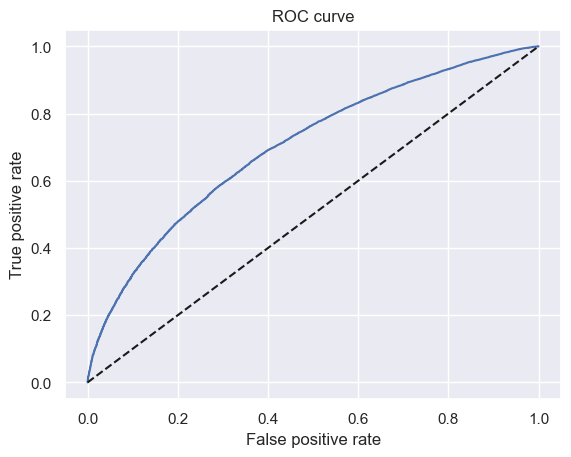

In [130]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [131]:
thresholds

array([       inf, 0.99194446, 0.9902417 , ..., 0.49039009, 0.39663846,
       0.37824114])

In [132]:
thresholds.shape

(17321,)

In [133]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [134]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [135]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,inf,0.000000,0.000000
1,0.991944,0.000000,0.000012
2,0.990242,0.000000,0.000193
3,0.990212,0.000098,0.000193
4,0.989752,0.000098,0.000289


In [136]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [137]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [138]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,3294.0
1,0.991944,0.000000,0.000012,796.0
2,0.990242,0.000000,0.000193,781.0
3,0.990212,0.000098,0.000193,781.0
4,0.989752,0.000098,0.000289,777.0


In [139]:
df_cutoffs['Score'][0] = max_score

In [140]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.991944,0.000000,0.000012,796.0
2,0.990242,0.000000,0.000193,781.0
3,0.990212,0.000098,0.000193,781.0
4,0.989752,0.000098,0.000289,777.0


In [141]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
17316,0.498425,0.999411,0.999964,419.0
17317,0.491792,0.999607,0.999964,417.0
17318,0.490390,0.999607,0.999976,417.0
17319,0.396638,1.000000,0.999976,387.0
17320,0.378241,1.000000,1.000000,381.0


In [142]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [143]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [144]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.991944,0.000000,0.000012,796.0,1,93256,0.000011,0.999989
2,0.990242,0.000000,0.000193,781.0,16,93241,0.000172,0.999828
3,0.990212,0.000098,0.000193,781.0,17,93240,0.000182,0.999818
4,0.989752,0.000098,0.000289,777.0,25,93232,0.000268,0.999732


In [145]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
17316,0.498425,0.999411,0.999964,419.0,93248,9,0.999903,0.000097
17317,0.491792,0.999607,0.999964,417.0,93250,7,0.999925,0.000075
17318,0.490390,0.999607,0.999976,417.0,93251,6,0.999936,0.000064
17319,0.396638,1.000000,0.999976,387.0,93255,2,0.999979,0.000021
17320,0.378241,1.000000,1.000000,381.0,93257,0,1.000000,0.000000


In [146]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.904249,0.257507,0.543104,595.0,47738,45519,0.511897,0.488103
5001,0.904248,0.257605,0.543104,595.0,47739,45518,0.511908,0.488092
5002,0.904246,0.257605,0.543128,595.0,47741,45516,0.511929,0.488071
5003,0.904245,0.257704,0.543128,595.0,47742,45515,0.511940,0.488060
5004,0.904208,0.257704,0.543308,595.0,47757,45500,0.512101,0.487899
5005,0.904204,0.257802,0.543308,595.0,47758,45499,0.512112,0.487888
5006,0.904181,0.257802,0.543405,595.0,47766,45491,0.512197,0.487803
5007,0.904178,0.257900,0.543405,595.0,47767,45490,0.512208,0.487792
5008,0.904151,0.257900,0.543561,595.0,47780,45477,0.512348,0.487652
5009,0.904147,0.257998,0.543561,595.0,47781,45476,0.512358,0.487642


In [147]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.953302,0.048577,0.204823,656.0,17509,75748,0.187750,0.812250
1001,0.953278,0.048577,0.204919,656.0,17517,75740,0.187836,0.812164
1002,0.953278,0.048675,0.204919,656.0,17518,75739,0.187846,0.812154
1003,0.953257,0.048675,0.205015,656.0,17526,75731,0.187932,0.812068
1004,0.953252,0.048871,0.205015,656.0,17528,75729,0.187954,0.812046
1005,0.953227,0.048871,0.205124,656.0,17537,75720,0.188050,0.811950
1006,0.953224,0.048970,0.205124,656.0,17538,75719,0.188061,0.811939
1007,0.953136,0.048970,0.205774,655.0,17592,75665,0.188640,0.811360
1008,0.953135,0.049068,0.205774,655.0,17593,75664,0.188651,0.811349
1009,0.953108,0.049068,0.205942,655.0,17607,75650,0.188801,0.811199


In [148]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [149]:
df_scorecard.to_csv('df_scorecard.csv')